In [1]:
import pandas as pd

red_wine = pd.read_csv("../data/winequality-red.csv", sep=';')
white_wine = pd.read_csv("../data/winequality-white.csv", sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [5]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [9]:
pipe['clf']

DecisionTreeClassifier()

In [10]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [12]:
from sklearn.model_selection import train_test_split

X = wine.drop(['color'], axis=1)
y = wine['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13,
                                                    stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

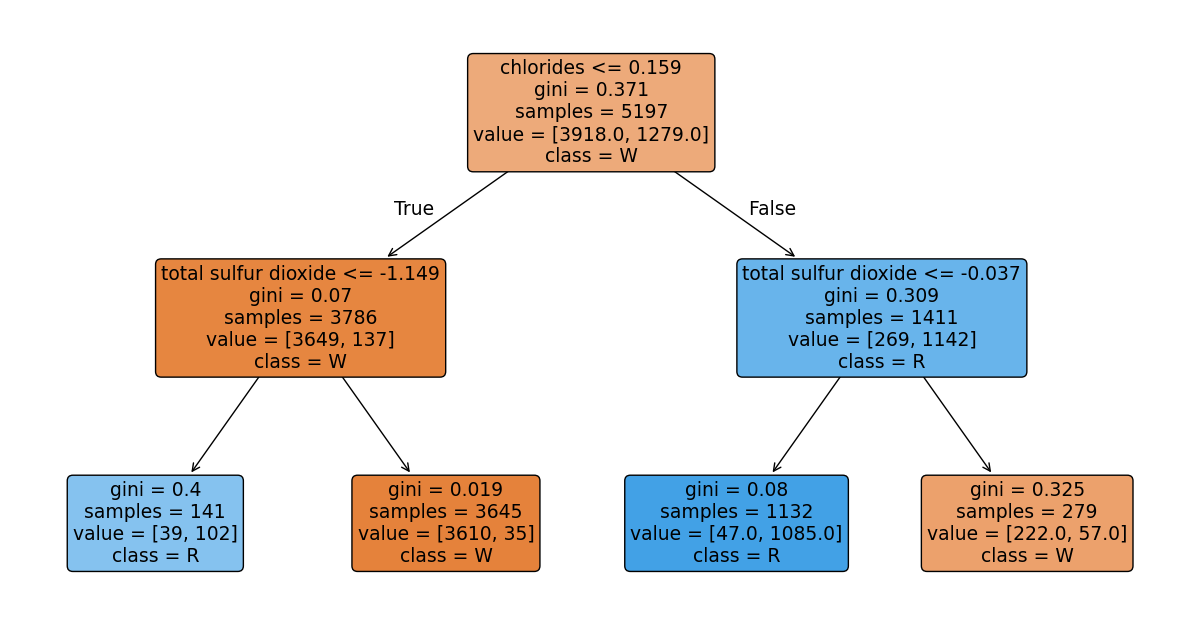

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(pipe['clf'],
                   feature_names=X.columns,
                   class_names = ['W', 'R'],
                   rounded=True, filled=True)